In [1]:
# 1. Load the cars dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from math import sqrt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
%matplotlib inline

carData = pd.read_csv('autos_small.csv')
carData.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio


In [2]:
# 2. Figure out the best strategy to fill missing values
carData.isnull().sum()
#carData.info()

price                     0
name                      0
yearOfRegistration        0
monthOfRegistration       0
gearbox                 577
powerPS                   0
model                   567
kilometer                 0
fuelType                943
brand                     0
vehicleType            1050
dtype: int64

In [3]:
## Since all the missing values are in categorical data it is better to drop them to avoid biasness in the dataset.
carData.dropna(inplace=True)

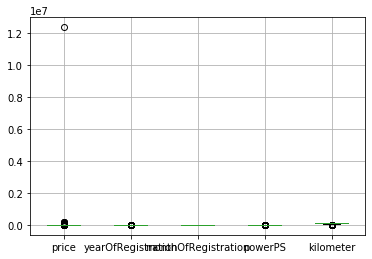

In [4]:
# 3. Complete any other preprocessing required.

carData[['gearbox','model','fuelType','brand','vehicleType']] = \
                                            carData[['gearbox','model','fuelType','brand','vehicleType']].astype('category')
carData.boxplot()

In [5]:
## Removing and Replacing outliers.

carData = carData[carData.price<110000]
outlPs = carData[carData.powerPS>800]
carData.powerPS = carData.powerPS.replace(outlPs.powerPS, 150)
carData2 = carData.copy()
carData.describe()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer
count,8004.000000,8004.000000,8004.000000,8004.000000,8004.000000
mean,6305.035607,2003.073338,6.141179,121.168916,125016.866567
std,7910.962863,6.437989,3.523656,66.716941,39360.235388
min,0.000000,1931.000000,0.000000,0.000000,5000.000000
25%,1450.000000,1999.000000,3.000000,75.000000,100000.000000
50%,3500.000000,2003.000000,6.000000,114.000000,150000.000000
75%,8200.000000,2008.000000,9.000000,150.000000,150000.000000
max,99990.000000,2016.000000,12.000000,585.000000,150000.000000


In [6]:
carData.drop(['monthOfRegistration','name'], axis=1, inplace=True)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8004 entries, 0 to 9999
Data columns (total 9 columns):
price                 8004 non-null int64
yearOfRegistration    8004 non-null int64
gearbox               8004 non-null category
powerPS               8004 non-null int64
model                 8004 non-null category
kilometer             8004 non-null int64
fuelType              8004 non-null category
brand                 8004 non-null category
vehicleType           8004 non-null category
dtypes: category(5), int64(4)
memory usage: 693.8 KB


In [7]:
carDataEnc = pd.get_dummies(carData, columns = ['gearbox','fuelType','brand','vehicleType'], drop_first=True)
X = carDataEnc.iloc[:, 1:].values
Y = carDataEnc.iloc[:, 0].values
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [8]:
# 4. Apply various regression models and find out which model is the best for this dataset

##### Model 1 - MLR

In [9]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#fit the model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

#predict the test set results
y_pred = mlr.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - float(len(Y)-1)/(len(Y)-len(mlr.coef_)-1)*(1 - r2)

rmse, r2, adj_r2,

(4706.363448180663, 0.6270719973550138, 0.6244440914599441)

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10, weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(y_test, y_pred))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

adj_r2 = 1 - float(len(Y)-1)/(len(Y)-len(mlr.coef_)-1)*(1 - r2)
rmse, r2, adj_r2

(4706.363448180663, 0.621375407354003, 0.6187073593877043)

In [11]:
# 4. Apply various regression models and find out which model is the best for this dataset
# 4.3 Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(y_test, y_pred))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

adj_r2 = 1 - float(len(Y)-1)/(len(Y)-len(mlr.coef_)-1)*(1 - r2)
rmse, r2, adj_r2

(4706.363448180663, 0.7621020328681299, 0.7604256410020944)

In [12]:
# 4. Apply various regression models and find out which model is the best for this dataset
# 4.4 Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(y_test, y_pred))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

adj_r2 = 1 - float(len(Y)-1)/(len(Y)-len(mlr.coef_)-1)*(1 - r2)
rmse, r2, adj_r2

(4706.363448180663, 0.6510817156649696, 0.648622998674563)

##### Model 2 - OLS

In [13]:
X = carData.iloc[:, 1:]
y = carData.iloc[:, 0]
X.head()

,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,1992,manuell,89,escort,60000,benzin,ford,kombi
2,1998,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,2006,manuell,0,a3,150000,diesel,audi,limousine
4,2002,automatik,41,fortwo,150000,diesel,smart,cabrio
5,2001,manuell,143,3er,150000,benzin,bmw,limousine


In [14]:
import category_encoders as ce
ohe = ce.OneHotEncoder()
X2 = ohe.fit_transform(X)#.toarray()
X2 = sm.add_constant(X2)
m2 = sm.OLS(y,X2).fit()
m2.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     76.01
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:33:35   Log-Likelihood:                -77840.
No. Observations:                8004   AIC:                         1.563e+05
Df Residuals:                    7717   BIC:                         1.583e+05
Df Model:                         286                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.028e+05   1.17e+04    -34.364      0.000   -4.26e+05    -3.8e+05
yearOfRegistration   366.0761     10.476     34.945      0.000     345.541     386.612
gearbox_1          -2.009e+05   5863.781    -34.260      0.000   -2.12e+05   -1.89e+05
gearbox_2          -2.019e+05   5858.283    -34.464      0.000   -2.13e+05    -1.9e+05
powerPS               27.6449      1.108     24.954      0.000      25.473      29.817
model_1            -3992.7711   1470.476     -2.715      0.007   -6875.302   -1110.240
model_2              212.7473   4246.447      0.050      0.960   -8111.442    8536.937
model_3            -3301.4355   1540.503     -2.143      0.032   -6321.239    -281.632
model_4            -3868.3180   1607.544     -2.406      0.016   -7019.540    -717.096
model_5               29.6365   2135.699      0.014      0.989   -4156.913    4216.186
model_6             -830.7936   1017.112     -0.817      0.414   -2824.609    1163.022
model_7            -1.352e+04   1500.563     -9.007      0.000   -1.65e+04   -1.06e+04
model_8            -3133.8353   4167.579     -0.752      0.452   -1.13e+04    5035.751
model_9             -646.2332    810.577     -0.797      0.425   -2235.185     942.718
model_10             665.6828    786.014      0.847      0.397    -875.119    2206.484
model_11           -1.467e+04   1456.396    -10.072      0.000   -1.75e+04   -1.18e+04
model_12           -1477.5099   1276.479     -1.157      0.247   -3979.754    1024.735
model_13           -4155.1318   1064.683     -3.903      0.000   -6242.200   -2068.064
model_14            1002.1737   1404.071      0.714      0.475   -1750.186    3754.533
model_15           -1.478e+04   1478.154    -10.002      0.000   -1.77e+04   -1.19e+04
model_16           -1.204e+04   3520.067     -3.420      0.001   -1.89e+04   -5138.028
model_17             936.9545   1059.021      0.885      0.376   -1139.014    3012.923
model_18           -6233.4173   1997.073     -3.121      0.002   -1.01e+04   -2318.612
model_19           -1.517e+04   1634.956     -9.277      0.000   -1.84e+04    -1.2e+04
model_20           -4455.3696   1014.053     -4.394      0.000   -6443.188   -2467.551
model_21            -996.3192   3084.517     -0.323      0.747   -7042.810    5050.172
model_22           -1746.2120   2984.435     -0.585      0.558   -7596.514    4104.090
model_23            1898.7794   2667.229      0.712      0.477   -3329.714    7127.273
model_24            2.827e+04   1734.785     16.298      0.000    2.49e+04    3.17e+04
model_25           -5366.4080   1278.989     -4.196      0.000   -7873.573   -2859.243
model_26           -4925.6294   1618.360     -3.044      0.002   -8098.055   -1753.204
model_27           -5047.1628    773.530     -6.525      0.000   -6563.493   -3530.833
model_28           -5842.8088    726.2

In [15]:
X3 = X.apply(LabelEncoder().fit_transform)
X3 = sm.add_constant(X3)
m3 = sm.OLS(y,X3).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     1141.
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:33:36   Log-Likelihood:                -80153.
No. Observations:                8004   AIC:                         1.603e+05
Df Residuals:                    7995   BIC:                         1.604e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                177.4782    666.409      0.266      0.790   -1128.858    1483.814
yearOfRegistration   256.0803     11.102     23.066      0.000     234.317     277.843
gearbox            -1525.0481    159.938     -9.535      0.000   -1838.569   -1211.528
powerPS               68.6222      1.416     48.457      0.000      65.846      71.398
model                  2.6500      1.037      2.555      0.011       0.617       4.683
kilometer          -1002.7542     24.093    -41.620      0.000   -1049.983    -955.525
fuelType             422.5416     59.700      7.078      0.000     305.514     539.570
brand                 10.4707      5.505      1.902      0.057      -0.321      21.262
vehicleType         -219.1771     36.108     -6.070      0.000    -289.958    -148.396
==============================================================================
Omnibus:                     7241.843   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           536734.545
Skew:                           4.062   Prob(JB):                         0.00
Kurtosis:                      42.286   Cond. No.                     1.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Model 3 - Feature Selection

In [16]:
X5 = carData2.iloc[:, 1:]
#Y5 = carData2.iloc[:, 0]
y5 = carData2['price'].tolist()
X5.head()

,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
2,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio
5,BMW_318ti_compact,2001,10,manuell,143,3er,150000,benzin,bmw,limousine


In [17]:
cartemp = X5[['name','gearbox','model','fuelType','brand','vehicleType']]
cartemp = cartemp.apply(LabelEncoder().fit_transform)
X5.drop(['name','gearbox','model','fuelType','brand','vehicleType'], axis=1, inplace=True)
X5 = pd.concat([X5,cartemp], axis=1)

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
tree_clf = ExtraTreesClassifier()
tree_clf.fit(X5, y5)
importances = tree_clf.feature_importances_

import operator
feature_names = X5.columns.tolist()
feature_imp_dir = dict(zip(feature_names, importances))
features = sorted(feature_imp_dir.items(), key=operator.itemgetter(1), reverse=True)
features

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[('name', 0.20558134870190503),
 ('yearOfRegistration', 0.1558577385481803),
 ('monthOfRegistration', 0.15449583963721697),
 ('powerPS', 0.1459420429121763),
 ('model', 0.10762250605456278),
 ('vehicleType', 0.07649295395309395),
 ('brand', 0.07386546795382203),
 ('kilometer', 0.05479223684787318),
 ('fuelType', 0.018279480678565278),
 ('gearbox', 0.007070384712604299)]

In [19]:
from sklearn.feature_selection import SelectFromModel
abc = SelectFromModel(tree_clf, prefit = True)
x_updated = abc.transform(X5)
print('Total Features count:', np.array(X5).shape[1])
print('Selected Features: ' ,np.array(x_updated).shape[1])

Total Features count: 10
Selected Features:  5


In [20]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(x_updated, y5, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#fit the model
mlr.fit(X_train, y_train)

#predict the test set results
y_pred = mlr.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - float(len(Y)-1)/(len(Y)-len(mlr.coef_)-1)*(1 - r2)

rmse, r2, adj_r2,

(6175.24348174302, 0.40509658664059056, 0.4047246790303384)

######  Analysis
   Among the various models generated above, Onehotencoded OLS Model appears to have the best fit comparing with other models.

In [21]:
# 5. Apply different Outlier detection methods and choose best approach to treat outliers 

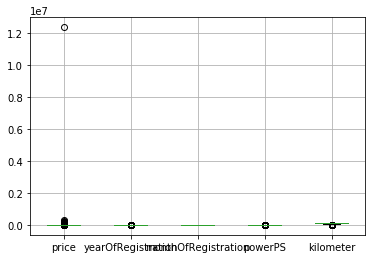

In [22]:
carData3 = pd.read_csv('autos_small.csv')
carData3.boxplot()

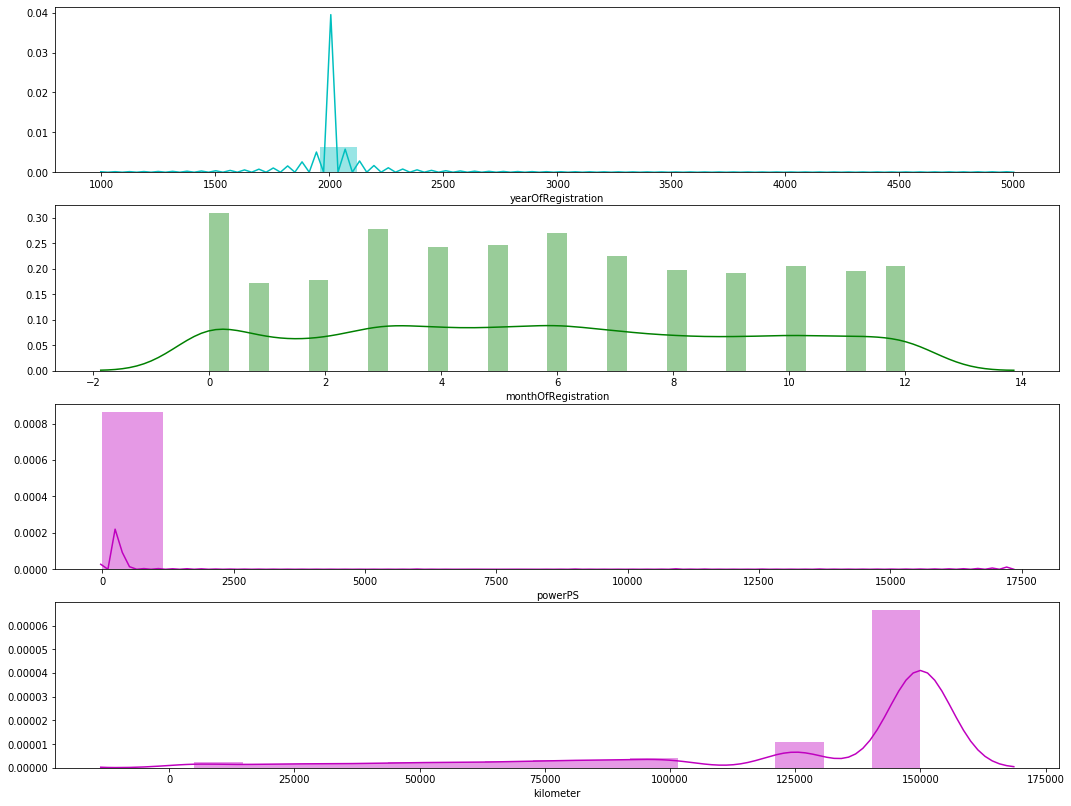

In [23]:
plt.figure(figsize = (18,14))
plt.subplot(411) 
sns.distplot(carData3.yearOfRegistration, bins=25, color='c')
plt.subplot(412) 
sns.distplot(carData3.monthOfRegistration, bins=35, color='g')
plt.subplot(413) 
sns.distplot(carData3.powerPS, bins=15, color='m')
plt.subplot(414) 
sns.distplot(carData3.kilometer, bins=15, color='m')

In [24]:
carData3.describe()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer
count,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000
mean,7.056705e+03,2003.637400,5.737600,122.01890,125034.000000
std,1.237501e+05,40.424633,3.706794,342.09721,40581.689607
min,0.000000e+00,1000.000000,0.000000,0.00000,5000.000000
25%,1.150000e+03,1999.000000,3.000000,69.00000,100000.000000
50%,2.999000e+03,2004.000000,6.000000,105.00000,150000.000000
75%,7.250000e+03,2008.000000,9.000000,150.00000,150000.000000
max,1.234568e+07,5000.000000,12.000000,17322.00000,150000.000000


In [25]:
## Removing price outliers 
## Replacing other outliers with mean value.

carData3 = carData3[carData3.price<110000]
carData3.yearOfRegistration = carData3[carData3.yearOfRegistration.between(carData3.yearOfRegistration.quantile(.05), \
                                                                           carData3.yearOfRegistration.quantile(.96))]
#outlYear = carData3[(carData3.yearOfRegistration<1910) | (carData3.yearOfRegistration>2019)]
#carData3.yearOfRegistration = carData3.yearOfRegistration.replace(outlYear.yearOfRegistration, 2004)
outlPs = carData3[carData3.powerPS>800]
carData3.powerPS = carData3.powerPS.replace(outlPs.powerPS, 200)
carData3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9989 entries, 0 to 9999
Data columns (total 11 columns):
price                  9989 non-null int64
name                   9989 non-null object
yearOfRegistration     9440 non-null object
monthOfRegistration    9989 non-null int64
gearbox                9413 non-null object
powerPS                9989 non-null int64
model                  9426 non-null object
kilometer              9989 non-null int64
fuelType               9046 non-null object
brand                  9989 non-null object
vehicleType            8939 non-null object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


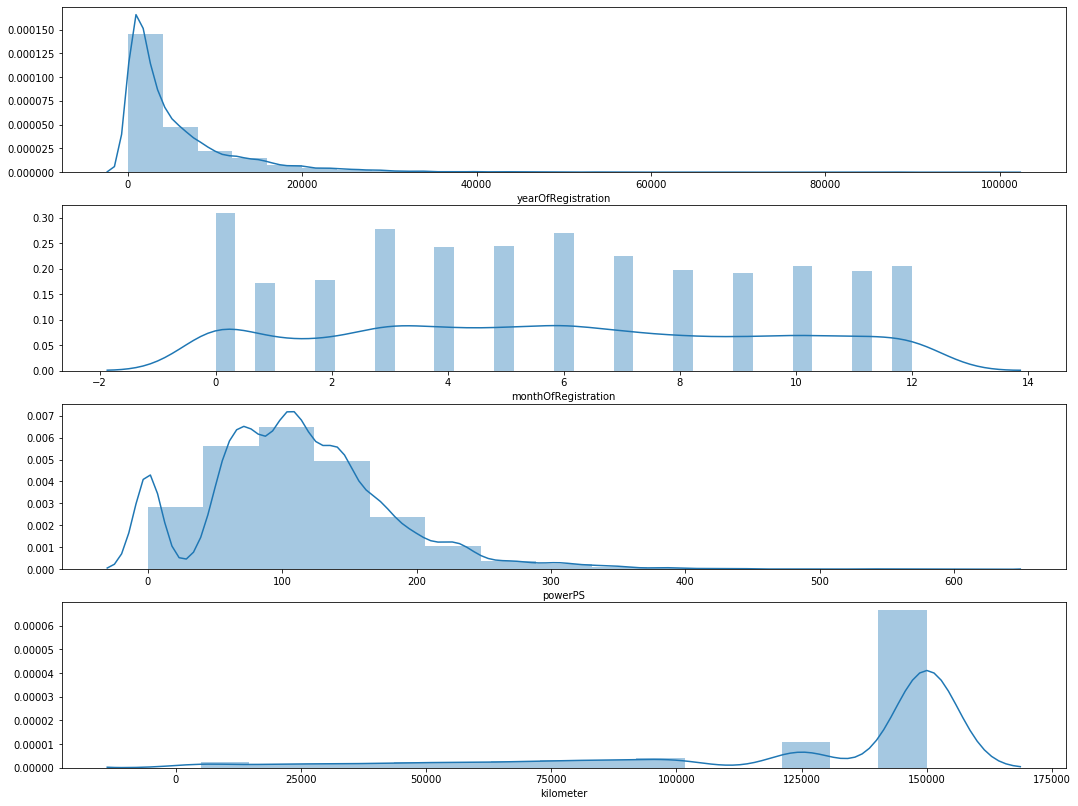

In [26]:
## After treating outliers
plt.figure(figsize = (18,14))
plt.subplot(411) 
sns.distplot(carData3.yearOfRegistration, bins=25)
plt.subplot(412) 
sns.distplot(carData3.monthOfRegistration, bins=35)
plt.subplot(413) 
sns.distplot(carData3.powerPS, bins=15)
plt.subplot(414) 
sns.distplot(carData3.kilometer, bins=15)

In [27]:
# 6. Apply Variance Inflation Factors calculation and find if the model built has collinearity between different variables

In [ ]:
important_features = [feature for (feature, score) in features]
important_features.append('price')
VIFDataSet = carData2[important_features]
VIFDataSet = VIFDataSet.apply(le.fit_transform)
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y,X = dmatrices('price ~ name+ yearOfRegistration+ monthOfRegistration	+ gearbox+ powerPS+ model+ kilometer+ fuelType+brand+ vehicleType'\
                                                                 ,data= VIFDataSet, return_type='dataframe')
vif_df = pd.DataFrame()
vif_df["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df["features"] = X.columns
print(vif_df)

#### Analysis
There is no high collinearity between the variables in the model. All variances are below 5.